In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob

import seaborn as sns
mako = sns.color_palette("mako", as_cmap=True)

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()

In [3]:
data = {} # data[L, c] contains (mwpm_fail, ca_fail, ca_mwpm_fail)
for f in glob.glob('data/fail_array/fail_array_*_*.npy'):
    L = int(f.split("_")[3])
    c = int(f.split("_")[4].split(".")[0])
    data[L, c] = np.load(f)

In [4]:
plotting_array = np.zeros((5, 5, 3))
for L, c in data:
    plotting_array[L//20-1,int(np.log2(c))-1,:] = data[L, c]

In [5]:
mwpm_fail = plotting_array[:,:,0]
ca_fail = plotting_array[:,:,1]
ca_mwpm_fail = plotting_array[:,:,2]

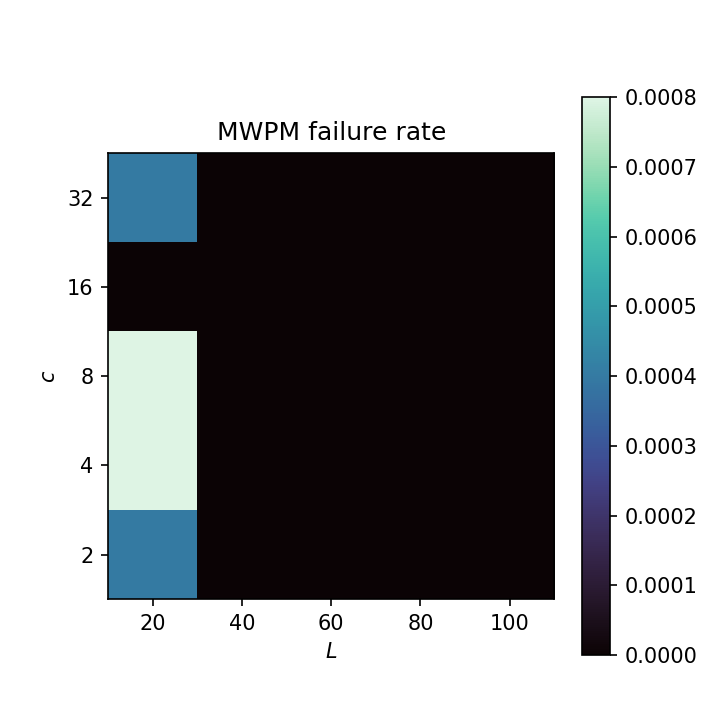

In [6]:
plt.matshow(mwpm_fail.T, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("MWPM failure rate")
plt.xlabel("$L$")
plt.ylabel("$c$")
plt.xticks(range(5), [20, 40, 60, 80, 100])
plt.yticks(range(5), [2, 4, 8, 16, 32])
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/fail_mwpm.png")
plt.show()

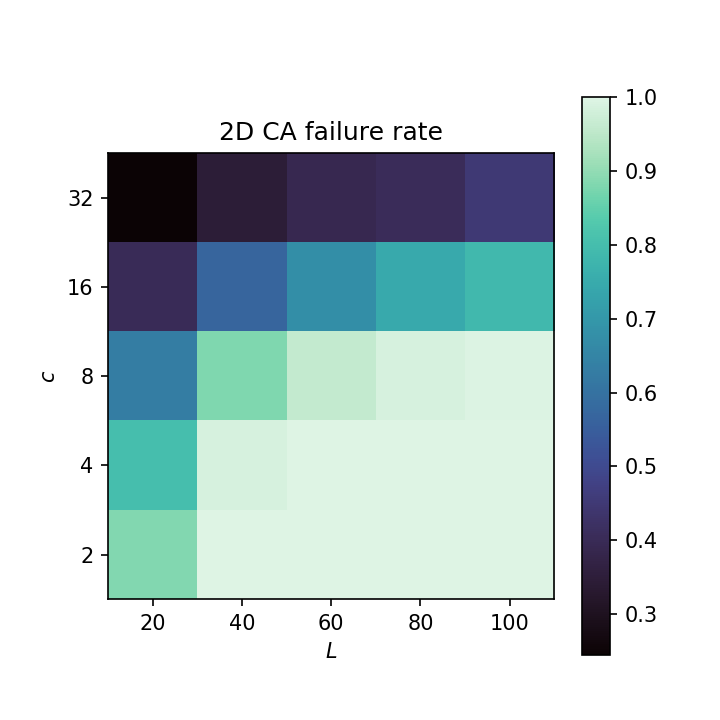

In [7]:
plt.matshow(ca_fail.T, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("2D CA failure rate")
plt.xlabel("$L$")
plt.ylabel("$c$")
plt.xticks(range(5), [20, 40, 60, 80, 100])
plt.yticks(range(5), [2, 4, 8, 16, 32])
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/fail_ca.png")
plt.show()

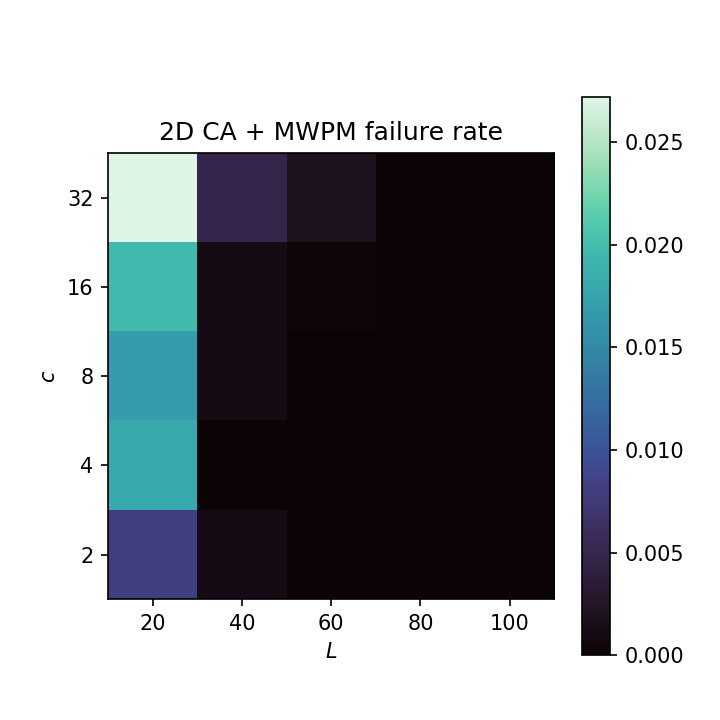

In [8]:
plt.matshow(ca_mwpm_fail.T, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("2D CA + MWPM failure rate")
plt.xlabel("$L$")
plt.ylabel("$c$")
plt.xticks(range(5), [20, 40, 60, 80, 100])
plt.yticks(range(5), [2, 4, 8, 16, 32])
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/fail_ca_mwpm.png")
plt.show()